# Project 3 lab notebook
@pseudocephalus

_to run code directly from notebook one should place `.ipynb` file in the folder with `/data` subfolder in it._

### 1. Place followed data files in `/data`

SRR292678 - paired end, insert size 470 bp ([forward reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R1_001.fastq.gz), [reverse reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R2_001.fastq.gz), 400 Mb each)

SRR292862 – mate pair, insert size 2 kb, ([forward reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R1_001.fastq.gz), [reverse reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R2_001.fastq.gz) 200 Mb each)
    
SRR292770 – mate pair, insert size 6 kb, ([forward reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R1_001.fastq.gz), [reverse reads](https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R2_001.fastq.gz), 200 Mb each)

### 2. Run FastQC for all of them

In [2]:
! fastqc data/*.*

Started analysis of SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 5% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 10% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 15% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 20% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 25% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 30% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 35% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 40% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 45% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 50% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 55% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 60% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 65% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 70% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 75% complete for SRR292678sub_S1_L001_R1_001.fastq.gz
Approx 80% complete for SRR29

SRR292770: 5102041 reads

SRR292862: 5102041 reads

SRR292678: 5499346 reads


### 3. Count and plot k-mers with Jellyfish

`sudo apt-get install jellyfish`

In [11]:
! gunzip data/*fastq.gz

Jellyfish is run on paired end data (SRR292678)
`-s` is somthing more than average E coli genome, guess 6 mb will fit

In [16]:
! jellyfish count -o joutput -m 31 -s 6000000 data/SRR292678sub_S1_L001_R1_001.fastq data/SRR292678sub_S1_L001_R2_001.fastq

In [19]:
! jellyfish histo joutput > hist.csv

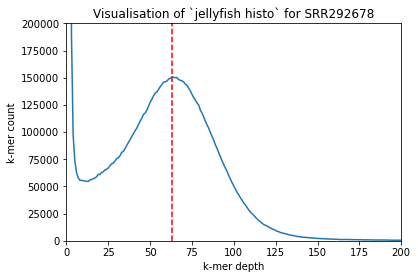

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.read_csv('hist.csv', header=None, sep=' ', index_col=0)
ax=hist.plot()
plt.title('Visualisation of `jellyfish histo` for SRR292678')
plt.ylabel('k-mer count')
plt.xlabel('k-mer depth')
plt.xlim(0,200)
plt.ylim(0, 200000)
ax.get_legend().remove()
plt.vlines(x=63, ymin=1, ymax=201000, colors='red', linestyles='--')

read length is 90

N = 63*90 / 90-31+1 = 94,5

T = 494941140

Genome length = 494941140/105 = 5 237 472 bp, looks like "L" E Coli size

### 4. Assembling with SPAdes

[get SPAdes](http://cab.spbu.ru/software/spades/) and place in project folder

In [80]:
! tar -xzf SPAdes-3.15.5-Linux.tar.gz

In [84]:
! python3 SPAdes-3.15.5-Linux/bin/spades.py --test



== Warning ==  No assembly mode was specified! If you intend to assemble high-coverage multi-cell/isolate data, use '--isolate' option.


Command line: SPAdes-3.15.4-Linux/bin/spades.py	--test	

System information:
  SPAdes version: 3.15.4
  Python version: 3.10.6
  OS: Linux-5.15.0-52-generic-x86_64-with-glibc2.35

Output dir: /home/quasicephalus/BI/Workshop/project3/spades_test
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Standard mode
  For multi-cell/isolate data we recommend to use '--isolate' option; for single-cell MDA data use '--sc'; for metagenomic data use '--meta'; for RNA-Seq use '--rna'.
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/home/quasicephalus/BI/Workshop/project3/SPAdes-3.15.4-Linux/share/spades/test_dataset/ecoli_1K_1.fq.gz']
      right reads: ['/home/quasicephalus/BI/Workshop/project3/SPAdes-3.15.4-Linux/share/spades/test_dataset/ecoli_1K_2.fq.gz']
      inter

In [26]:
! python3 SPAdes-3.15.5-Linux/bin/spades.py -t 4 -1 data/SRR292678sub_S1_L001_R1_001.fastq -2 data/SRR292678sub_S1_L001_R2_001.fastq -o spades --isolate

Command line: SPAdes-3.15.5-Linux/bin/spades.py	-t	4	-1	/home/quasicephalus/BI/Workshop/project3/data/SRR292678sub_S1_L001_R1_001.fastq	-2	/home/quasicephalus/BI/Workshop/project3/data/SRR292678sub_S1_L001_R2_001.fastq	-o	/home/quasicephalus/BI/Workshop/project3/spades	--isolate	

System information:
  SPAdes version: 3.15.5
  Python version: 3.10.6
  OS: Linux-5.15.0-53-generic-x86_64-with-glibc2.35

Output dir: /home/quasicephalus/BI/Workshop/project3/spades
Mode: ONLY assembling (without read error correction)
Debug mode is turned OFF

Dataset parameters:
  Isolate mode
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/home/quasicephalus/BI/Workshop/project3/data/SRR292678sub_S1_L001_R1_001.fastq']
      right reads: ['/home/quasicephalus/BI/Workshop/project3/data/SRR292678sub_S1_L001_R2_001.fastq']
      interlaced reads: not specified
      single reads: not specified
      merged reads: not specified
Assembly parameters:
  k: auto

seems like my 4gb oldman doesnt handle it.

https://disk.yandex.ru/d/4xEI_7gdxzN2D

https://disk.yandex.ru/d/XHCbTIrvxzN5Y

### 4. QUAST 
Install from tarball as described in https://cab.spbu.ru/software/quast/

In [1]:
! python3 quast-5.2.0/quast.py SRR292678/contigs.fasta SRR292678/scaffolds.fasta

/home/quasicephalus/BI/Workshop/project3/quast-5.2.0/quast.py SRR292678/contigs.fasta SRR292678/scaffolds.fasta

Version: 5.2.0, f81f5f6

System information:
  OS: Linux-5.15.0-53-generic-x86_64-with-glibc2.35 (linux_64)
  Python version: 3.10.6
  CPUs number: 4

Started: 2022-11-24 19:33:28

Logging to /home/quasicephalus/BI/Workshop/project3/quast_results/results_2022_11_24_19_33_28/quast.log
NOTICE: Maximum number of threads is set to 1 (use --threads option to set it manually)

CWD: /home/quasicephalus/BI/Workshop/project3
Main parameters: 
  MODE: default, threads: 1, min contig length: 500, min alignment length: 65, min alignment IDY: 95.0, \
  ambiguity: one, min local misassembly length: 200, min extensive misassembly length: 1000

Contigs:
  Pre-processing...
  1  SRR292678/contigs.fasta ==> contigs
  2  SRR292678/scaffolds.fasta ==> scaffolds

2022-11-24 19:33:29
Running Basic statistics processor...
  Contig files: 
    1  contigs
    2  scaffolds
  Calculating N50 and L50..

N50 = 111860, n of contigs = 210

In [16]:
! python3 quast-5.2.0/quast.py three_libs_spades_out/scaffolds.fasta

/home/quasicephalus/BI/Workshop/project3/quast-5.2.0/quast.py three_libs_spades_out/scaffolds.fasta

Version: 5.2.0, f81f5f6

System information:
  OS: Linux-5.15.0-53-generic-x86_64-with-glibc2.35 (linux_64)
  Python version: 3.10.6
  CPUs number: 4

Started: 2022-12-02 02:13:14

Logging to /home/quasicephalus/BI/Workshop/project3/quast_results/results_2022_12_02_02_13_14/quast.log
NOTICE: Maximum number of threads is set to 1 (use --threads option to set it manually)

CWD: /home/quasicephalus/BI/Workshop/project3
Main parameters: 
  MODE: default, threads: 1, min contig length: 500, min alignment length: 65, min alignment IDY: 95.0, \
  ambiguity: one, min local misassembly length: 200, min extensive misassembly length: 1000

Contigs:
  Pre-processing...
  three_libs_spades_out/scaffolds.fasta ==> scaffolds

2022-12-02 02:13:16
Running Basic statistics processor...
  Contig files: 
    scaffolds
  Calculating N50 and L50...
    scaffolds, N50 = 2815616, L50 = 1, auN = 1633387.0, Tota

N50 = 300763, n of contigs = 105

Number of contigs is twice less, and N50 increased 3 times, which is great

### 5. Prokka


`sudo apt-get install libdatetime-perl libxml-simple-perl libdigest-md5-perl git default-jre bioperl`

`sudo cpan Bio::Perl`

`git clone https://github.com/tseemann/prokka.git $HOME/prokka`

`$HOME/prokka/bin/prokka --setupdb`

do NOT run (it takes about 13 hours):

In [17]:
! $HOME/prokka/bin/prokka three_libs_spades_out/scaffolds.fasta --centre X --compliant


[02:14:23] This is prokka 1.14.6
[02:14:23] Written by Torsten Seemann <torsten.seemann@gmail.com>
[02:14:23] Homepage is https://github.com/tseemann/prokka
[02:14:23] Local time is Fri Dec  2 02:14:23 2022
[02:14:23] You are quasicephalus
[02:14:23] Operating system is linux
[02:14:23] You have BioPerl 1.7.8
Argument "1.7.8" isn't numeric in numeric lt (<) at /home/quasicephalus/prokka/bin/prokka line 259.
[02:14:23] System has 4 cores.
[02:14:23] Option --cpu asked for 8 cores, but system only has 4
[02:14:23] Will use maximum of 4 cores.
[02:14:23] Annotating as >>> Bacteria <<<
[02:14:23] Generating locus_tag from 'three_libs_spades_out/scaffolds.fasta' contents.
[02:14:23] Setting --locustag IAEMKGFD from MD5 2ae640fd6def9ac6a7454ed12b9bdadd
[02:14:23] Enabling options to ensure Genbank/ENA/DDJB submission compliance.
[02:14:23] Creating new output folder: PROKKA_12022022
[02:14:23] Running: mkdir -p PROKKA_12022022
[02:14:23] Using filename prefix: PROKKA_12022022.XXX
[02:14:23] 

[02:14:27] 1 tRNA-SeC [72129,72223] 35 (tca)
[02:14:27] 2 tRNA-Ala c[122894,122969] 34 (ggc)
[02:14:27] 3 tRNA-Ala c[123009,123084] 34 (ggc)
[02:14:27] 4 tRNA-Val [125784,125859] 34 (tac)
[02:14:27] 5 tRNA-Glu c[326197,326272] 35 (ttc)
[02:14:27] 6 tmRNA [352225,352587] 90,125 ANDENYALAA**
[02:14:27] 7 tRNA-Met c[369872,369947] 34 (cat)
[02:14:27] 8 tRNA-Arg c[401974,402050] 35 (acg)
[02:14:27] 9 tRNA-Arg c[402249,402325] 35 (acg)
[02:14:27] 10 tRNA-Arg c[402524,402600] 35 (acg)
[02:14:27] 11 tRNA-Ser c[402604,402696] 35 (gct)
[02:14:27] 12 tRNA-Met c[494712,494788] 35 (cat)
[02:14:27] 13 tRNA-Leu c[498569,498655] 35 (gag)
[02:14:27] 14 tRNA-Thr c[592314,592389] 34 (ggt)
[02:14:27] 15 tRNA-Pro c[892264,892340] 35 (cgg)
[02:14:27] 16 tRNA-Thr [981718,981793] 34 (cgt)
[02:14:27] 17 tRNA-Ser [1069278,1069358] 38 (gga)
[02:14:27] 18 tRNA-Arg [1286866,1286942] 35 (tct)
[02:14:27] 19 tRNA-Arg c[1516746,1516822] 35 (tct)
[02:14:27] 20 tRNA-Tyr [1557019,1557103] 35 (gta)
[02:14:27] 21 tRNA-Ser

[02:20:13] Modify product: Prophage tail fiber assembly protein homolog TfaE => Prophage tail fiber assembly protein TfaE
[02:20:13] Modify product: UPF0259 membrane protein YciC => hypothetical protein
[02:20:13] Modify product: Probable intracellular septation protein A => putative intracellular septation protein A
[02:20:13] Modify product: Uncharacterized acyl-CoA thioester hydrolase HI_0827 => putative acyl-CoA thioester hydrolase
[02:20:13] Modify product: UPF0263 protein YciU => hypothetical protein
[02:20:13] Modify product: UPF0056 inner membrane protein MarC => hypothetical protein
[02:20:13] Modify product: Uncharacterized NTE family protein Rv1063c => putative NTE family protein
[02:20:13] Modify product: UPF0225 protein YchJ => hypothetical protein
[02:20:13] Modify product: Uncharacterized protein YcgM => putative protein YcgM
[02:20:13] Modify product: Probable autotransporter ROD_p1121 => putative autotransporter
[02:20:13] Modify product: UPF0757 protein YmgG => hypoth

[02:20:15] Modify product: Uncharacterized fimbrial-like protein SfmA => putative fimbrial-like protein SfmA
[02:20:15] Modify product: Probable fimbrial chaperone SfmC => putative fimbrial chaperone SfmC
[02:20:15] Modify product: Uncharacterized fimbrial-like protein SfmH => putative fimbrial-like protein SfmH
[02:20:15] Modify product: Uncharacterized fimbrial-like protein SfmF => putative fimbrial-like protein SfmF
[02:20:15] Modify product: Uncharacterized protein YncE => putative protein YncE
[02:20:15] Modify product: Uncharacterized protein YdcY => putative protein YdcY
[02:20:15] Modify product: Uncharacterized protein YibL => putative protein YibL
[02:20:15] Modify product: Uncharacterized protein YibN => putative protein YibN
[02:20:15] Modify product: Uncharacterized protein HI_0755 => putative protein
[02:20:15] Modify product: UPF0758 protein SP_1088 => hypothetical protein
[02:20:15] Modify product: UPF0701 protein YicC => hypothetical protein
[02:20:15] Modify product: 

[02:20:16] Modify product: Uncharacterized methyltransferase YcgJ => putative methyltransferase YcgJ
[02:20:16] Modify product: Uncharacterized protein YaeQ => putative protein YaeQ
[02:20:16] Modify product: UPF0253 protein YaeP => hypothetical protein
[02:20:16] Modify product: UPF0126 inner membrane protein YadS => hypothetical protein
[02:20:16] Modify product: Uncharacterized fimbrial-like protein YadN => putative fimbrial-like protein YadN
[02:20:16] Modify product: Probable fimbrial chaperone YadV => putative fimbrial chaperone YadV
[02:20:16] Modify product: Uncharacterized fimbrial-like protein YadM => putative fimbrial-like protein YadM
[02:20:16] Modify product: Uncharacterized fimbrial-like protein YadL => putative fimbrial-like protein YadL
[02:20:16] Modify product: Uncharacterized fimbrial-like protein YadK => putative fimbrial-like protein YadK
[02:20:16] Modify product: Uncharacterized fimbrial-like protein YadC => putative fimbrial-like protein YadC
[02:20:16] Modify 

[02:20:17] Modify product: Uncharacterized protein YdfO => putative protein YdfO
[02:20:17] Modify product: Uncharacterized protein YlcG => putative protein YlcG
[02:20:17] Modify product: Uncharacterized HTH-type transcriptional regulator HI_1476 => putative HTH-type transcriptional regulator
[02:20:17] Modify product: Uncharacterized fimbrial-like protein YbgD => putative fimbrial-like protein YbgD
[02:20:17] Modify product: UPF0394 inner membrane protein YeeE => hypothetical protein
[02:20:17] Modify product: UPF0053 inner membrane protein YoaE => hypothetical protein
[02:20:17] Modify product: Probable diguanylate cyclase DgcE => putative diguanylate cyclase DgcE
[02:20:17] Modify product: UPF0339 protein YegP => hypothetical protein
[02:20:17] Modify product: 23S rRNA 5-hydroxycytidine C2501 synthase => 23S rRNA 5-hydroxycytidine synthase
[02:20:17] Modify product: Uncharacterized fimbrial-like protein YehA => putative fimbrial-like protein YehA
[02:20:17] Modify product: Probable

[02:20:19] Modify product: Uncharacterized protein YshB => putative protein YshB
[02:20:19] Modify product: Probable GTP-binding protein EngB => putative GTP-binding protein EngB
[02:20:19] Modify product: Probable acyltransferase YihG => putative acyltransferase YihG
[02:20:19] Modify product: Uncharacterized protein YggR => putative protein YggR
[02:20:19] Modify product: UPF0401 protein YkfF => hypothetical protein
[02:20:19] Modify product: Probable RNA polymerase sigma factor FecI => putative RNA polymerase sigma factor FecI
[02:20:19] Modify product: Uncharacterized ABC transporter ATP-binding protein YknY => putative ABC transporter ATP-binding protein YknY
[02:20:19] Modify product: GTP cyclohydrolase 1 type 2 homolog => GTP cyclohydrolase 1 type 2 
[02:20:19] Modify product: UPF0401 protein YkfF => hypothetical protein
[02:20:20] Modify product: UPF0265 protein YeeX => hypothetical protein
[02:20:20] Cleaned 378 /product names
[02:20:20] Deleting unwanted file: PROKKA_12022022

[02:20:58] Assigned 5144 locus_tags to CDS and RNA features.
[02:20:58] Writing outputs to PROKKA_12022022/
[02:21:03] Generating annotation statistics file
[02:21:03] Generating Genbank and Sequin files
[02:21:03] Running: tbl2asn -V b -a r10k -l paired-ends -M n -N 1 -y 'Annotated using prokka 1.14.6 from https://github.com/tseemann/prokka' -Z PROKKA_12022022\/PROKKA_12022022\.err -i PROKKA_12022022\/PROKKA_12022022\.fsa 2> /dev/null
[02:21:26] Deleting unwanted file: PROKKA_12022022/errorsummary.val
[02:21:26] Deleting unwanted file: PROKKA_12022022/PROKKA_12022022.dr
[02:21:26] Deleting unwanted file: PROKKA_12022022/PROKKA_12022022.fixedproducts
[02:21:26] Deleting unwanted file: PROKKA_12022022/PROKKA_12022022.ecn
[02:21:26] Deleting unwanted file: PROKKA_12022022/PROKKA_12022022.val
[02:21:26] Repairing broken .GBK output that tbl2asn produces...
[02:21:26] Running: sed 's/COORDINATES: profile/COORDINATES:profile/' < PROKKA_12022022\/PROKKA_12022022\.gbf > PROKKA_12022022\/PROKK

### 6. Barrnap
`cd $HOME`

`git clone https://github.com/tseemann/barrnap.git`

`cd barrnap/bin`

do NOT run this too

In [1]:
! ./barrnap -o ~/BI/Workshop/project3/ecolix.fasta < ~/BI/Workshop/project3/three_libs_spades_out/contigs.fasta >~/BI/Workshop/project3/barrnap.gff


/bin/bash: line 1: ./barrnap: Permission denied


### 7. BLAST

BLAST was run with `ecolix.fasta` from step above.

Aigned on [this](https://www.ncbi.nlm.nih.gov/nucleotide/NC_011748.1?report=genbank&log$=nuclalign&blast_rank=1&RID=RNGA3SSR013). Browsing showed that this is an ENAC strain we interested in [(link)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2617782/)

### 8. MAUVE

Found Shiga-like toxins' genes in the middle of bacterial chromosome fragment: 

stxA 3483886-3484845

stxB 3483605-3483876


### 9. ResFinder and Mauve again

Original E.coli 55989 is resistant only to tetracycline, but E.coli X is also resistant to:

number of beta-lactam ABs: blaCTX-M-15, blaTEM-1B

sulfamethoxazole: sul1, sul2

streptomycin: aph(3'')-Ib, aph(6)-Id

doxycycline, tetracycline: tet(A)

All of these genes are located on unaligned fragment with nearby plasmid genes 